In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import io
import requests
import datetime as dt

In [2]:
df=pd.read_csv("dominos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [4]:
df.isna().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["delivery_time"] = df["order_delivered_at"] - df["order_placed_at"]
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056


In [7]:
durations=df['delivery_time']
# Convert the Series object to a Timedelta object
timedeltas = pd.to_timedelta(durations)

# Calculate the total number of seconds in each Timedelta object
seconds = timedeltas.dt.total_seconds()

print(seconds)


0        1028.443132
1         935.925241
2         906.291385
3        2312.019399
4         970.619056
            ...     
14995     932.409378
14996    1004.672912
14997     924.676238
14998     957.810358
14999     922.499311
Name: delivery_time, Length: 15000, dtype: float64


In [8]:
min_diff = seconds / 60

print(f"The time difference is {min_diff} hours")

The time difference is 0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Name: delivery_time, Length: 15000, dtype: float64 hours


In [9]:
df['delivery_time_min']=min_diff
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056,16.176984


In [10]:
df.describe()

,order_id,delivery_time,delivery_time_min
count,1.500000e+04,15000,15000.000000
mean,1.530610e+06,0 days 00:20:29.963359588,20.499389
std,4.330271e+03,0 days 01:36:09.621708129,96.160362
min,1.523111e+06,0 days 00:15:00.000620,15.000010
25%,1.526861e+06,0 days 00:15:16.489559750,15.274826
50%,1.530610e+06,0 days 00:15:47.879164,15.797986
75%,1.534360e+06,0 days 00:17:16.779654250,17.279661
max,1.538110e+06,5 days 01:39:49.882496,7299.831375


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            15000 non-null  int64          
 1   order_placed_at     15000 non-null  datetime64[ns] 
 2   order_delivered_at  15000 non-null  datetime64[ns] 
 3   delivery_time       15000 non-null  timedelta64[ns]
 4   delivery_time_min   15000 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(1), timedelta64[ns](1)
memory usage: 586.1 KB


In [12]:
print("Average Delivery Time", df['delivery_time'].mean())
print("Median Delivery TIme", df['delivery_time'].median())
print("Minimum Delivery Time", df['delivery_time'].min())
print("Maximum Delivery Time", df['delivery_time'].max())
print("25% of Delivery TIme", df['delivery_time'].quantile(0.25))
print("50% of Delivery TIme", df['delivery_time'].quantile(0.50))
print("75% of Delivery TIme", df['delivery_time'].quantile(0.75))
print("90% of Delivery TIme", df['delivery_time'].quantile(0.90))
print("95% of Delivery TIme", df['delivery_time'].quantile(0.95))
print("96% of Delivery TIme", df['delivery_time'].quantile(0.96))
print("97% of Delivery TIme", df['delivery_time'].quantile(0.97))
print("98% of Delivery TIme", df['delivery_time'].quantile(0.98))
print("99% of Delivery TIme", df['delivery_time'].quantile(0.99))

Average Delivery Time 0 days 00:20:29.963359588
Median Delivery TIme 0 days 00:15:47.879164
Minimum Delivery Time 0 days 00:15:00.000620
Maximum Delivery Time 5 days 01:39:49.882496
25% of Delivery TIme 0 days 00:15:16.489559750
50% of Delivery TIme 0 days 00:15:47.879164
75% of Delivery TIme 0 days 00:17:16.779654250
90% of Delivery TIme 0 days 00:21:09.414273300
95% of Delivery TIme 0 days 00:27:15.662639799
96% of Delivery TIme 0 days 00:30:07.277748439
97% of Delivery TIme 0 days 00:33:56.165859539
98% of Delivery TIme 0 days 00:41:31.058556720
99% of Delivery TIme 0 days 01:05:03.851188140


In [13]:
df['delivery_time']=pd.to_timedelta(df.delivery_time).dt.components.iloc[:,2]
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time,delivery_time_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16,16.176984


<AxesSubplot:ylabel='Frequency'>

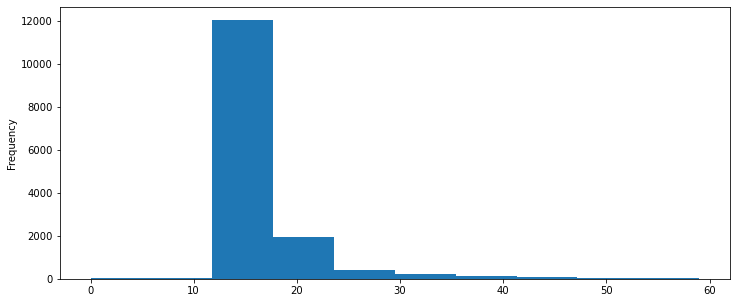

In [14]:
df['delivery_time'].plot(kind='hist', figsize=(12,5))

In [15]:
df['delivery_time'].nunique()

60

In [16]:
delivery_stats=pd.DataFrame(df['delivery_time'].value_counts().values, index=df['delivery_time'].value_counts().index)
delivery_stats.reset_index(inplace=True)
delivery_stats.columns=['delivery_time(min)','total_deliveries']
delivery_stats['percentage_deliveries(%)']=(delivery_stats['total_deliveries']/15000*100).round(2)
delivery_stats

,delivery_time(min),total_deliveries,percentage_deliveries(%)
0,15,8410,56.07
1,16,2471,16.47
2,17,1166,7.77
3,18,694,4.63
4,19,442,2.95
5,20,295,1.97
6,21,237,1.58
7,22,170,1.13
8,23,126,0.84
9,24,110,0.73


<AxesSubplot:>

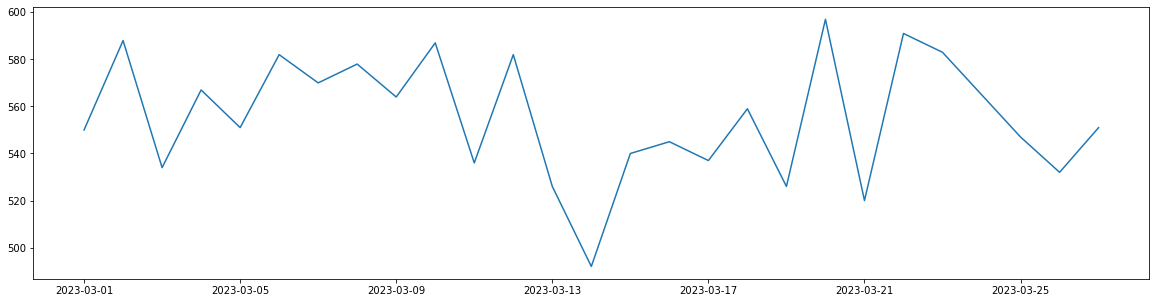

In [17]:
(df['order_placed_at'].dt.date).value_counts().plot(kind='line', figsize=(20,5))

In [18]:
order_by_week=pd.DataFrame((df['order_placed_at'].dt.week).value_counts())
order_by_week.reset_index(inplace=True)
order_by_week.columns=['week','total_orders']
order_by_week['perc_order']=(order_by_week['total_orders']/15000*100).round(2)
order_by_week


C:\Users\admin\AppData\Local\Temp\ipykernel_9172\1930889213.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  order_by_week=pd.DataFrame((df['order_placed_at'].dt.week).value_counts())


,week,total_orders,perc_order
0,10,3999,26.66
1,12,3935,26.23
2,11,3725,24.83
3,9,2790,18.60
4,13,551,3.67


In [19]:
time=pd.DataFrame(df['order_placed_at'].dt.hour)
time.columns=['hour']
time

,hour
0,0
1,0
2,0
3,0
4,0
...,...
14995,23
14996,23
14997,23
14998,23


In [20]:
time['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [21]:
def time_period(hour):
    if (hour>=0 and hour<=6):
        return '12AM-6AM'
    elif (hour>6 and hour<12):
        return '6AM-12PM'
    elif (hour>=12 and hour<=18):
        return '12PM-6PM'
    else:
        return '6PM-12AM'
    
time['time_period']=time['hour'].apply(time_period)
time.head()

,hour,time_period
0,0,12AM-6AM
1,0,12AM-6AM
2,0,12AM-6AM
3,0,12AM-6AM
4,0,12AM-6AM


In [22]:
order_by_time=pd.DataFrame(time['time_period'].value_counts())
order_by_time.reset_index(inplace=True)
order_by_time.columns=['time_period', 'total_orders']
order_by_time['perc_order']=(order_by_time['total_orders']/15000*100).round(2)
order_by_time

,time_period,total_orders,perc_order
0,12AM-6AM,4402,29.35
1,12PM-6PM,4330,28.87
2,6PM-12AM,3190,21.27
3,6AM-12PM,3078,20.52


<AxesSubplot:xlabel='time_period', ylabel='total_orders'>

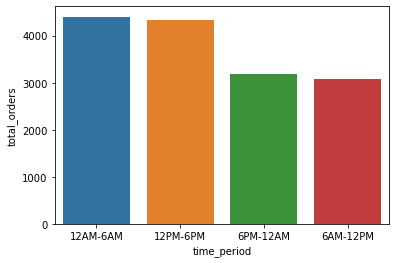

In [23]:
sns.barplot(x='time_period', y='total_orders', data=order_by_time)

<AxesSubplot:xlabel='week', ylabel='total_orders'>

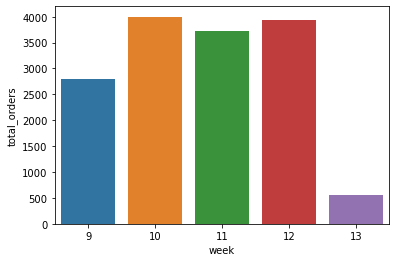

In [24]:
sns.barplot(x='week', y='total_orders', data=order_by_week)